In [3]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/thesis-relation-extraction-vn

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/thesis-relation-extraction-vn


In [4]:
from method2_encode_features import RE_DataEncoder2
from Models import CNN_model

import numpy as np
import seaborn as sns
import pickle
import torch

In [5]:
with open('data/data_encoder_method2.obj', 'rb') as f:
    Encoder=pickle.load(f)

vocab_size=Encoder.vocab_size
max_len= Encoder.max_len

X_train = np.load('data/X_train_method2.npy')
y_train = np.load('data/y_train_method2.npy')
X_test = np.load('data/X_test_method2.npy')
y_test = np.load('data/y_test_method2.npy')

sentence_emb_train=torch.load('data/sentence_emb_train_tensor_method2.pt')
sentence_emb_test=torch.load('data/sentence_emb_test_tensor_method2.pt')

In [14]:
import Models

In [15]:
from importlib import reload
reload(Models)

<module 'Models' from '/content/drive/MyDrive/thesis-relation-extraction-vn/Models.py'>

In [16]:
cnn=Models.CNN_model_method2(Encoder.max_len-1)
cnn.build_model()

In [17]:
cnn.model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 e1_position1 (InputLayer)   [(None, 11)]                 0         []                            
                                                                                                  
 e2_position1 (InputLayer)   [(None, 11)]                 0         []                            
                                                                                                  
 pos_tag1 (InputLayer)       [(None, 11)]                 0         []                            
                                                                                                  
 dp_type (InputLayer)        [(None, 11)]                 0         []                            
                                                                                            

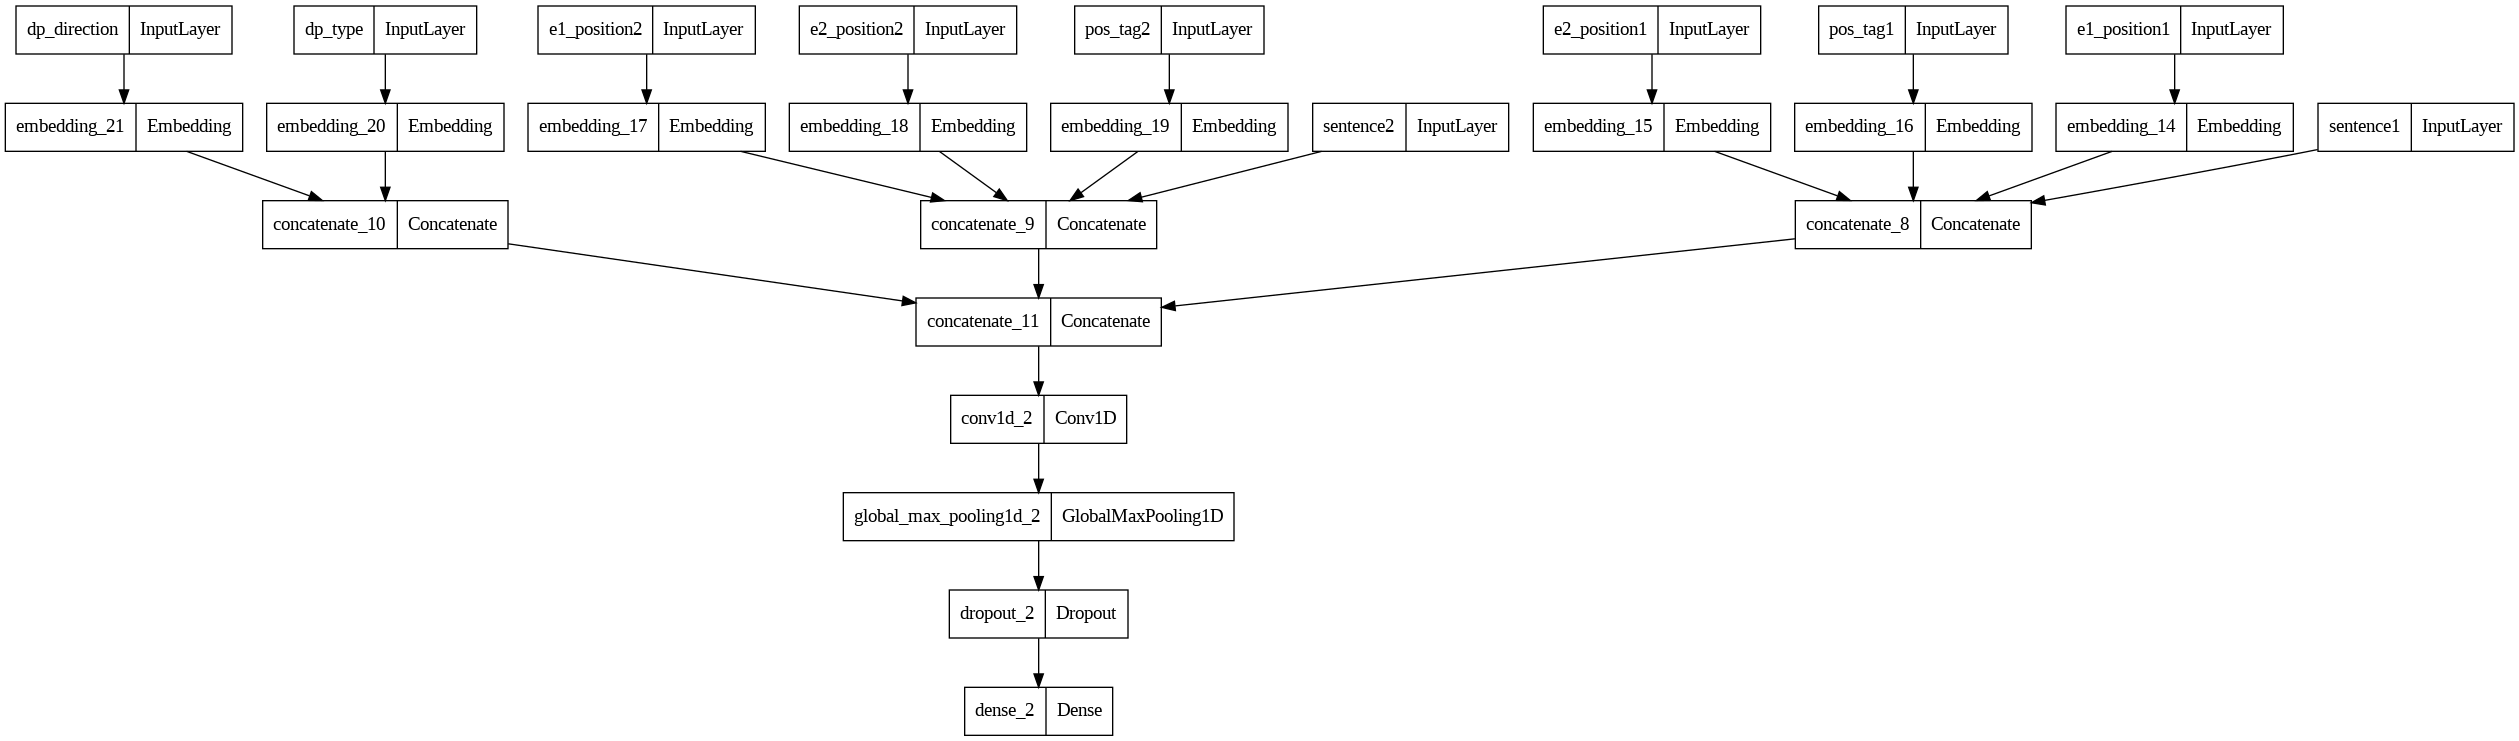

In [18]:
from keras.utils import plot_model
plot_model(cnn.model)

In [19]:
def exclude_last(matrix):
    return np.array([x[:-1] for x in matrix])
def exclude_first(matrix):
    return np.array([x[1:] for x in matrix])

In [20]:
cnn.train_model(
    [
        exclude_last(sentence_emb_train.cpu().detach().numpy()),
        exclude_last(X_train[2]),
        exclude_last(X_train[3]),
        exclude_last(X_train[4]),
        exclude_first(sentence_emb_train.cpu().detach().numpy()),
        exclude_first(X_train[2]),
        exclude_first(X_train[3]),
        exclude_first(X_train[4]),

        exclude_last(X_train[5]),
        exclude_last(X_train[6])
    ],
    y_train, epochs=3
  )

Epoch 1/3
250/250 [==============================] - 49s 188ms/step - loss: 1.5700 - accuracy: 0.5162
Epoch 2/3
250/250 [==============================] - 40s 158ms/step - loss: 1.0475 - accuracy: 0.6670
Epoch 3/3
250/250 [==============================] - 41s 163ms/step - loss: 0.8133 - accuracy: 0.7344


In [22]:
cnn.evaluate(
    [
        exclude_last(sentence_emb_test.cpu().detach().numpy()),
        exclude_last(X_test[2]),
        exclude_last(X_test[3]),
        exclude_last(X_test[4]),
        exclude_first(sentence_emb_test.cpu().detach().numpy()),
        exclude_first(X_test[2]),
        exclude_first(X_test[3]),
        exclude_first(X_test[4]),

        exclude_last(X_test[5]),
        exclude_last(X_test[6])
     ], y_test, Encoder.dict_labels)

85/85 [==============================] - 2s 22ms/step
Full classes:
                           precision    recall  f1-score   support

      Cause-Effect(e1,e2)       0.83      0.81      0.82       134
      Cause-Effect(e2,e1)       0.72      0.75      0.73       194
   Component-Whole(e1,e2)       0.75      0.55      0.64       162
   Component-Whole(e2,e1)       0.49      0.64      0.56       150
 Content-Container(e1,e2)       0.76      0.80      0.78       153
 Content-Container(e2,e1)       0.70      0.67      0.68        39
Entity-Destination(e1,e2)       0.90      0.78      0.84       291
Entity-Destination(e2,e1)       0.00      0.00      0.00         1
     Entity-Origin(e1,e2)       0.67      0.75      0.71       211
     Entity-Origin(e2,e1)       0.76      0.60      0.67        47
 Instrument-Agency(e1,e2)       0.54      0.32      0.40        22
 Instrument-Agency(e2,e1)       0.70      0.60      0.65       134
 Member-Collection(e1,e2)       0.87      0.41      0.55    

In [ ]:
cnn.save_model("DK_second_all_3ep")

In [ ]:
cnn.load_model("DK_second_all_3ep")